**Electronic Gadget Review Corpus**


**introduction :**

In this project, I will perform sentiment analysis and extract key words from a corpus of Indian reviews focused on electrical gadgets. The goal is to understand how the usage of electrical gadget jargon has evolved over time in these reviews. By analyzing the sentiment and frequency of jargon words, this research will provide insights into the changing language trends and consumer perceptions in the Indian market.

**Research Question**

How does the usage of electrical gadget-specific jargon, impact the overall sentiment of consumer reviews?

**Objectives**:

The objective of this project is to analyze how electrical gadget-specific jargon words, like "watt" and "battery," have evolved over time in reviews. I aim to track the frequency of these jargon words in the reviews to see if they have become more or less common. Additionally, I will perform sentiment analysis to understand the overall mood of the reviews. This will help identify any changes in consumer perceptions and attitudes toward electrical gadgets. The goal is to uncover trends and patterns in both the language used and the sentiment expressed in these reviews.

**Methodology:**

1. **KWIC (Key Word in Context) Analysis** – Examines how electrical gadget-specific jargon appears within consumer reviews to understand its contextual usage and sentiment impact.  

2. **Frequent Word Analysis** – Identifies the most commonly used jargon and non-jargon words in consumer reviews to determine their prevalence and significance.  

3. **Sentiment Analysis** – Measures the emotional tone of jargon-heavy and non-jargon-heavy reviews to assess how technical language influences overall consumer sentiment.


**justification:**

a) **Sentiment Analysis for Contextual Understanding**: Sentiment analysis helps determine the overall mood (positive, negative, or neutral) of the reviews. By examining how the use of specific electrical gadget jargon (e.g., "watt," "battery") correlates with sentiment, we can understand whether these terms influence consumer perceptions of the gadget's quality, performance, and reliability. This method directly addresses how jargon shapes the tone of the review, which is crucial to answering the research questions.

b) **Keyword Frequency Analysis for Evolving Language Trends:** Analyzing the frequency of electrical gadget-specific jargon over time allows us to track how often terms like "watt" and "battery" appear in reviews, reflecting shifts in consumer focus and language use. This contributes to understanding how the relevance and importance of these technical terms evolve and how they affect the overall context of the review. By examining these trends, we gain insights into how gadget jargon influences consumer understanding and opinions over time.



In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!pip install pdfplumber
!pip install nltk
!pip install wordcloud
!pip install seaborn
!pip install matplotlib
!pip install vaderSentiment

import os
import pdfplumber  # for PDF text extraction
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 2: Set folder path (Make sure 'Corpusdata' folder is in Google Drive)
folder_path = "/content/drive/My Drive/Corpusdata"
files = os.listdir(folder_path)

# Step 3: Read & Extract Text from PDFs and TXT Files
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + " "  # Extract text from each page
    return text.strip()

def read_text_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        return file.read()

corpus = []
for file in files:
    file_path = os.path.join(folder_path, file)
    if file.endswith(".pdf"):
        corpus.append(extract_text_from_pdf(file_path))
    elif file.endswith(".txt"):
        corpus.append(read_text_file(file_path))

# Combine all text into one large corpus
corpus_text = " ".join(corpus)

# Step 4: Text Preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    return [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words and word.isalpha()]

processed_words = preprocess_text(corpus_text)

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 79.0 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


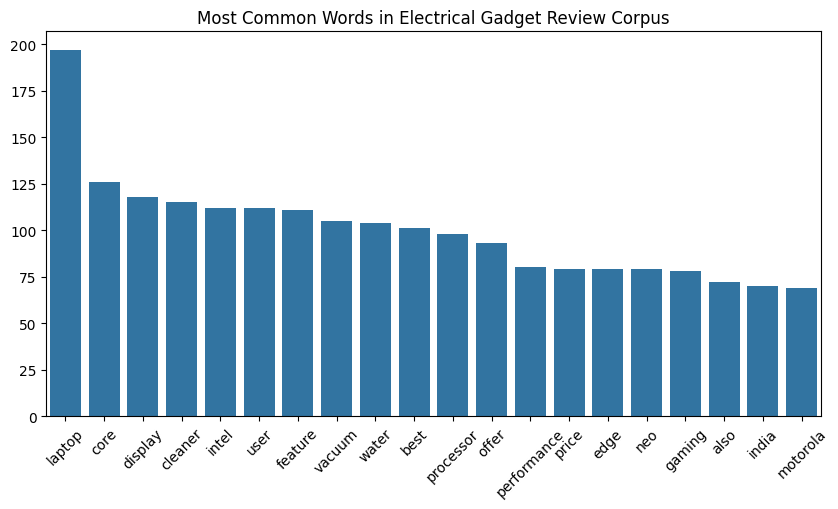

In [ ]:
# Step 5: Frequent Word Analysis
from collections import Counter

word_freq = Counter(processed_words)
common_words = word_freq.most_common(20)

# Plot Most Common Words
plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.xticks(rotation=45)
plt.title("Most Common Words in Electrical Gadget Review Corpus")
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the corpus text
sentiment_scores = analyzer.polarity_scores(corpus_text)

# Print the sentiment scores
print(sentiment_scores)

{'neg': 0.029, 'neu': 0.797, 'pos': 0.174, 'compound': 1.0}


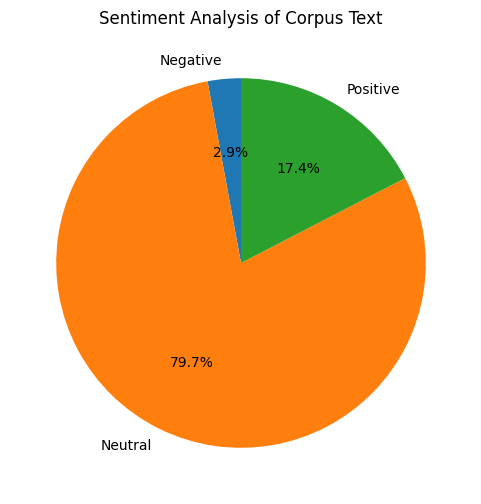

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated sentiment_scores using VADER
# sentiment_scores = analyzer.polarity_scores(corpus_text)

# Extract sentiment proportions
sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_proportions = [sentiment_scores['neg'], sentiment_scores['neu'], sentiment_scores['pos']]

# Create pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(sentiment_proportions, labels=sentiment_labels, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Analysis of Corpus Text')
plt.show()

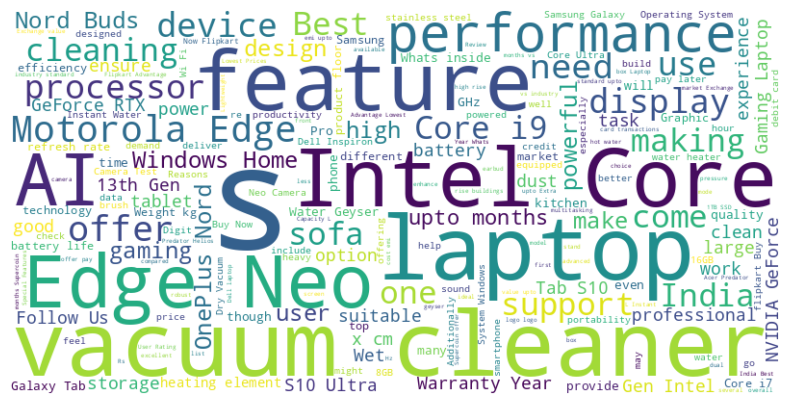

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming corpus_text contains your text data

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
from nltk.text import Text

# Assuming 'corpus_text' contains your corpus data
corpus_text = " ".join(corpus)  # If 'corpus' is a list of documents
text_object = Text(nltk.word_tokenize(corpus_text))

# Define your keywords
keywords = [ 'battery', 'power', 'performance']  # Add more as needed

# Perform KWIC analysis for each keyword
for keyword in keywords:
    print(f"KWIC for '{keyword}':")
    text_object.concordance(keyword, width=100, lines=5)  # Adjust width and lines as needed
    print("\n")

KWIC for 'battery':
Displaying 5 of 57 matches:
r the perfect balance of speed , efficiency , battery life , and portability , essential for use in
or clear visuals . Offering up to 18 hours of battery life and a 13.6-inch Liquid Retina display fo
 enhanced portability . A rapid-charging 57Wh battery , an FHD 1080p camera with facial recognition
s user needs . Additionally , the robust 68Wh battery guarantees up to 12 hours and 30 minutes of c
on power ranging from 800 Pa to 3200 Pa . The battery life of the 3200mAh battery will vary dependi


KWIC for 'power':
Displaying 5 of 69 matches:
ime AI-enhanced diagnostics laptop , balancing power with efficiency for AI diagnostics development
choose from four adjustable modes with suction power ranging from 800 Pa to 3200 Pa . The battery l
s and several efficiency gains with regards to power consumption and thermals . Arrow Lake borrows 
s and several efficiency gains with regards to power consumption and thermals . Arrow Lake borrows 
e Ul

**Interpretation of Results**

**Bar Plot Interpretation**



The bar plot shows the most frequently used words in consumer reviews of electrical gadgets. Several **jargon words** related to electronics—such as **"processor," "core," "display," "performance," and "Intel"**—appear frequently, alongside more general terms like **"offer" and "price."**  

This suggests that **technical jargon is a key part of consumer discussions** when reviewing electrical gadgets. The presence of jargon words may indicate that consumers **focus on technical specifications** when evaluating products, which could influence their sentiment (positive or negative) based on performance expectations.  

To better understand the impact, analyzing the **sentiment scores of jargon-heavy reviews** will reveal whether technical terms lead to more **positive, neutral, or negative** opinions.

**Word cloud Explanation**

The word cloud represents the most frequently used words in consumer reviews of electrical gadgets, with larger words appearing more often in the text. It highlights a strong presence of technical jargon such as "Intel," "Core," "processor," "performance," and "display," indicating that consumers focus on product specifications in their reviews. Common product-related terms like "vacuum cleaner," "laptop," and "AI" also suggest that discussions revolve around specific gadgets and their features. This suggests that jargon plays a significant role in shaping consumer opinions. To understand its impact on sentiment, further analysis is needed to determine whether jargon-heavy reviews are generally positive, neutral, or negative, and how consumers use technical terms when expressing satisfaction or dissatisfaction.

**Pie chart Explanation**

The pie chart represents the **sentiment analysis** of consumer reviews on electrical gadgets. It shows that **79.7% of the reviews are neutral**, meaning most reviews do not strongly express positive or negative emotions. **17.4% of the reviews are positive**, indicating that some customers express satisfaction with the gadgets. A small portion, **2.9% of the reviews, are negative**, meaning very few consumers had complaints. This suggests that while consumers frequently discuss gadget features and performance, they mostly provide factual or neutral opinions rather than strongly positive or negative feedback.

**KWIC Interpretation**

The **KWIC (Key Word in Context) analysis** helps understand how specific jargon words like "battery," "power," and "performance" are used in consumer reviews. It shows these words in the sentences where they appear, allowing us to see their meaning in context.  

For example:  
- **"Battery"** is often mentioned with terms like "battery life," "portability," and "charging," showing that consumers discuss how long a device lasts and how convenient it is.  
- **"Power"** is used in relation to "power consumption," "efficiency," and "AI diagnostics," indicating that reviews focus on energy efficiency and processing strength.  
- **"Performance"** appears with words like "high performance," "visual excellence," and "optimal adjustments," suggesting that consumers evaluate gadgets based on speed, quality, and usability.  

This analysis helps determine whether jargon-heavy reviews focus on technical details and whether they have a positive, negative, or neutral sentiment.


